# Exploring Dandiset 000563: Allen Institute Openscope - Barcoding

*This notebook was generated with the assistance of AI. Please be cautious when interpreting code or results—review, verify, and adapt the notebook for your own analyses.*

## Overview

[Dandiset 000563](https://dandiarchive.org/dandiset/000563/0.250311.2145) contains large-scale extracellular electrophysiology recordings (Neuropixels probes) from mouse visual system circuits, including neocortex and subcortical structures. The dataset is focused on responses to temporally modulated ("white noise") visual stimuli and provides rich data for exploring neural coding, spike timing precision, and cell type "barcodes."

This notebook demonstrates how to:

- Connect to the DANDI Archive and enumerate assets within the dandiset.
- Stream NWB files directly for inspection (no local downloading).
- Load and explore metadata and local field potential (LFP) data using `pynwb`, `h5py`, `remfile`, and `dandi`.
- Visualize key aspects of the data such as probe geometry and a snippet of LFP signals.

## Required Packages

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `pandas`
- `numpy`
- `matplotlib`

All code assumes these packages are already installed on your system.

## 1. Connect to the DANDI Archive and List Available Assets

We begin by using the DANDI API to identify available files within the selected dandiset.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI archive and fetch the dandiset
dandiset_id = "000563"
dandiset_version = "0.250311.2145"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first 10 assets in the dandiset
print("Listing some assets in the dandiset:")
for i, asset in enumerate(dandiset.get_assets()):
    print(asset.path)
    if i >= 9:
        break

Listing some assets in the dandiset:
sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb
sub-699241/sub-699241_ses-1318772854_probe-3_ecephys.nwb
sub-699241/sub-699241_ses-1318772854_probe-4_ecephys.nwb
sub-699241/sub-699241_ses-1318772854_probe-0_ecephys.nwb
sub-699241/sub-699241_ses-1318772854_ogen.nwb
sub-699241/sub-699241_ses-1318772854_probe-2_ecephys.nwb
sub-699846/sub-699846_ses-1314466742_probe-1_ecephys.nwb
sub-699846/sub-699846_ses-1314466742_probe-2_ecephys.nwb
sub-699846/sub-699846_ses-1314466742_probe-4_ecephys.nwb
sub-699846/sub-699846_ses-1314466742_probe-3_ecephys.nwb


## 2. Select and Stream an Example NWB File

Here, we'll work with one example NWB file containing LFP recordings for a specific mouse and session (`sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb`). 

The file will be streamed remotely using `remfile`, not downloaded to disk.

In [2]:
import remfile

# Choose one specific asset's path
example_asset_path = "sub-699241/sub-699241_ses-1318772854_probe-1_ecephys.nwb"

# Get the download URL for the chosen NWB file
example_asset = next(dandiset.get_assets_by_glob(example_asset_path))
url = example_asset.download_url

print(f"Streaming NWB file from: {url}")
remote_file = remfile.File(url)

Streaming NWB file from: https://api.dandiarchive.org/api/dandisets/000563/versions/0.250311.2145/assets/55148cf3-9d15-4d05-a190-4a73e007e48d/download/


## 3. Load NWB Data and Inspect Metadata

We use `h5py` (for remote HDF5 access) and `pynwb` (for NWB files) to read metadata and data from the streamed file.

In [3]:
import h5py
import pynwb

# Open the remote NWB file using h5py and pynwb
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print high-level NWB session information
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Stimulus Notes: {nwb.stimulus_notes}")
print(f"Institution: {nwb.institution}")

# Print subject information
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Subject age in days: {subject.age_in_days}")
print(f"Sex: {subject.sex}")
print(f"Species: {subject.species}")
print(f"Genotype: {subject.genotype}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: LFP data and associated info for one probe
Identifier: 1
Session Start Time: 2023-12-19 00:00:00-08:00
Stimulus Notes: OpenScopeTemporalBarcode
Institution: Allen Institute for Brain Science
Subject ID: 699241
Subject age in days: 124.0
Sex: M
Species: Mus musculus
Genotype: Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt


## 4. Explore the LFP Data Structure

We now examine the local field potential (LFP) data available in the file for one probe. We summarize the data shape and sampling parameters.

In [4]:
# Access acquisition group and extract LFP ElectricalSeries
acquisition = nwb.acquisition
probe_1_lfp = acquisition["probe_1_lfp"]
electrical_series = probe_1_lfp.electrical_series
probe_1_lfp_data = electrical_series["probe_1_lfp_data"]

# Print details about the LFP data
print(f"LFP data shape: {probe_1_lfp_data.data.shape} (samples, channels)")
print(f"LFP data type: {probe_1_lfp_data.data.dtype}")
print(f"Sampling units: {probe_1_lfp_data.unit}")
print(f"Sampling rate (Hz): {nwb.electrode_groups['probeC'].lfp_sampling_rate}")

# Print mapping to electrodes table
print("Electrodes table columns:")
print(probe_1_lfp_data.electrodes.table.colnames)

LFP data shape: (10178133, 96) (samples, channels)
LFP data type: float32
Sampling units: volts
Sampling rate (Hz): 625.0
Electrodes table columns:
('location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering')


## 5. View the Electrode Metadata

Each channel's anatomical location and geometry are stored in an electrodes table. Let's view the first few channels' metadata.

In [5]:
import pandas as pd

# Convert electrodes table to a pandas DataFrame and display first rows
electrodes_df = probe_1_lfp_data.electrodes.table.to_dataframe()
electrodes_df.head()

,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
1002,Eth,probeC abc.EcephysElectrodeGroup at 0x12824337...,probeC,40,59,1,2,True,7543.0,3332.0,7104.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1006,Eth,probeC abc.EcephysElectrodeGroup at 0x12824337...,probeC,80,59,1,6,True,7554.0,3299.0,7109.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1010,LP,probeC abc.EcephysElectrodeGroup at 0x12824337...,probeC,120,59,1,10,True,7565.0,3265.0,7114.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1014,LP,probeC abc.EcephysElectrodeGroup at 0x12824337...,probeC,160,59,1,14,True,7579.0,3224.0,7119.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1018,LP,probeC abc.EcephysElectrodeGroup at 0x12824337...,probeC,200,59,1,18,True,7590.0,3191.0,7123.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


## 6. Plot Probe Geometry

We'll visualize the probe geometry by plotting the (x, y, z) coordinates of each channel.

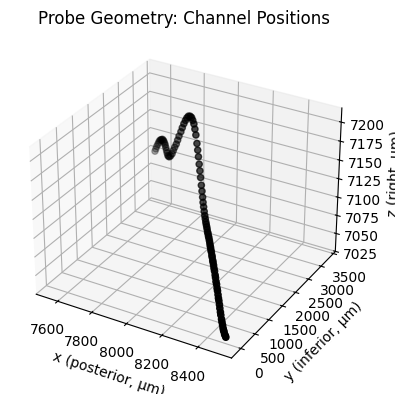

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    electrodes_df['x'], 
    electrodes_df['y'],
    electrodes_df['z'],
    c='k', marker='o'
)
ax.set_xlabel('x (posterior, µm)')
ax.set_ylabel('y (inferior, µm)')
ax.set_zlabel('z (right, µm)')
ax.set_title('Probe Geometry: Channel Positions')
plt.tight_layout()
plt.show()

## 7. Plot Example LFP Data from a Few Channels

Let's visualize the LFP signals from the first three channels for a brief time window (e.g., the first 5 seconds).

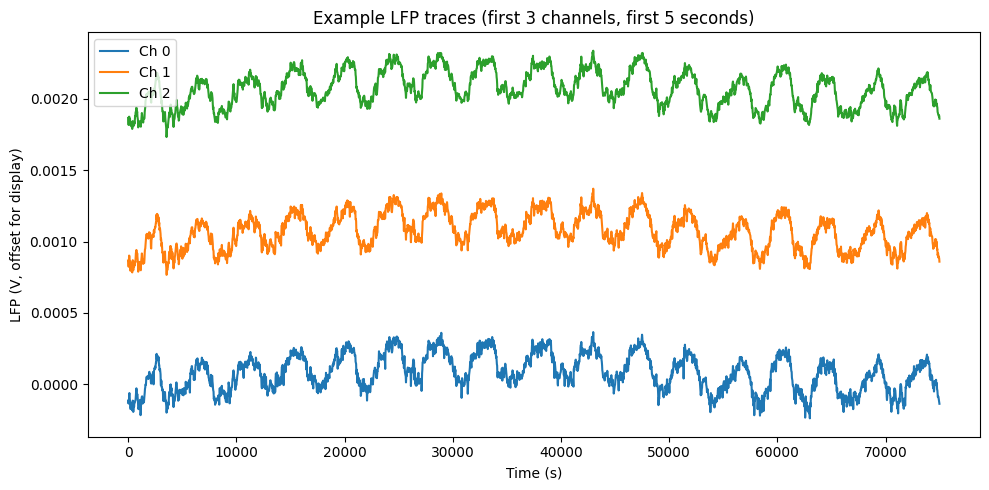

In [7]:
import numpy as np

# Extract timestamps and data for a small window
timestamps = np.array(probe_1_lfp_data.timestamps)
data = probe_1_lfp_data.data  # This will be a remote h5py dataset

# Select time window (e.g., first 5 seconds)
fs = nwb.electrode_groups['probeC'].lfp_sampling_rate
n_seconds = 5
n_samples = int(fs * n_seconds)

# Load the first N samples from the first 3 channels
times_window = timestamps[:n_samples]
lfp_window = data[:n_samples, :3]  # shape (n_samples, 3)

plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(times_window, lfp_window[:,i] + i*0.001, label=f'Ch {i}')  # Offset for clarity
plt.xlabel("Time (s)")
plt.ylabel("LFP (V, offset for display)")
plt.title("Example LFP traces (first 3 channels, first 5 seconds)")
plt.legend()
plt.tight_layout()
plt.show()

## Next Steps

This notebook has introduced the key steps for exploring Dandiset 000563, demonstrated remote-streaming of NWB files, and shown how to visualize both metadata and timeseries data.

**For further reanalysis, consider:**
- Examining other probes or sessions
- Accessing spike and unit data
- Exploring responses to white noise visual stimuli at the population or single-unit level

Please review the [Dandiset landing page](https://dandiarchive.org/dandiset/000563/0.250311.2145) for protocol details and additional resources.